<a href="https://colab.research.google.com/github/ABBAS-37405/PYTHON-AND-DATA-SCIENCE/blob/main/Practice_of_Tomek_Links.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TOMEK LINKS
Tomek Links is an under-sampling technique used in machine learning, particularly when dealing with imbalanced datasets. It identifies pairs of instances (one from the majority class and one from the minority class) that are very close to each other but belong to different classes. These pairs are considered 'Tomek Links' if the two instances are each other's nearest neighbors. The majority class instance from the Tomek Link pair is then removed. The primary goal of using Tomek Links is to clean the boundaries between classes, making them more distinct and thereby improving the performance of classification models, especially on the minority class.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import train_test_split

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Original class distribution: Counter({0: 9262, 1: 738})


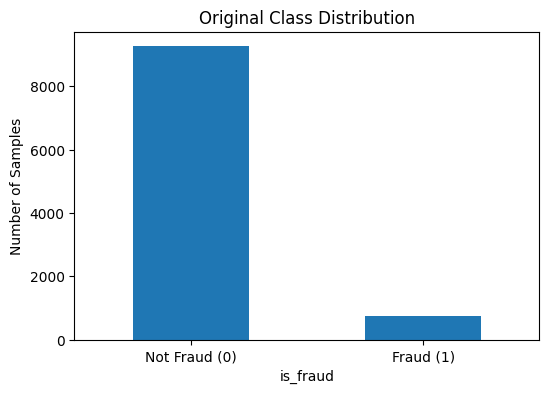

In [5]:
# Load your dataset
df = pd.read_csv("/content/drive/MyDrive/Datasets/credit_fraud_data.csv")

# Separate features and target
X = df.drop("is_fraud", axis=1)
y = df["is_fraud"]

# Show original class distribution
print("Original class distribution:", Counter(y))

# Visualize original class distribution
plt.figure(figsize=(6,4))
y.value_counts().plot(kind='bar', title='Original Class Distribution')
plt.xticks([0,1], ['Not Fraud (0)', 'Fraud (1)'], rotation=0)
plt.ylabel("Number of Samples")
plt.show()

# Split the data before applying SMOTE to avoid data leakage
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [6]:
from imblearn.under_sampling import TomekLinks

# Apply Tomek Links
tomek = TomekLinks(sampling_strategy='majority')
X_tomek, y_tomek = tomek.fit_resample(X_train, y_train)

# Show new class distribution
print("After Tomek Links class distribution:", Counter(y_tomek))

After Tomek Links class distribution: Counter({0: 7134, 1: 590})


# SOMOTE TOMEK
SMOTETomek is a hybrid sampling technique that combines the Synthetic Minority Over-sampling Technique (SMOTE) with Tomek Links. It is used to address class imbalance in datasets by both over-sampling the minority class (using SMOTE to create synthetic samples) and under-sampling the majority class (using Tomek Links to remove instances that form Tomek Links). This dual approach not only helps to balance the class distribution but also cleans the decision boundary between classes, leading to better generalization and improved performance of classification models on imbalanced data.

In [7]:
from imblearn.combine import SMOTETomek

# Apply SMOTE + Tomek Links
smt =SMOTETomek(random_state=42)
X_resampled, y_resampled = smt.fit_resample(X_train, y_train)

# Show resampled class distribution
print("After SMOTE + Tomek Links:", Counter(y_resampled))

After SMOTE + Tomek Links: Counter({0: 7284, 1: 7284})


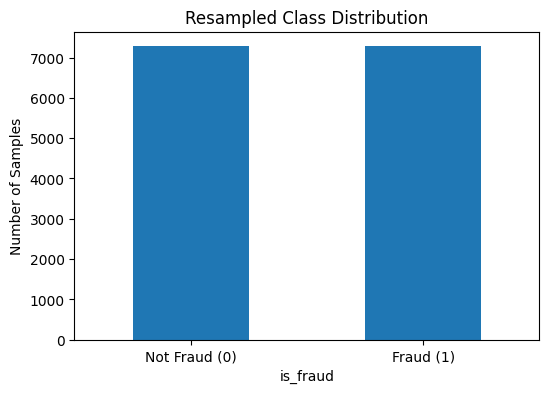

In [8]:
plt.figure(figsize=(6,4))
y_resampled.value_counts().plot(kind='bar', title='Resampled Class Distribution')
plt.xticks([0,1], ['Not Fraud (0)', 'Fraud (1)'], rotation=0)
plt.ylabel("Number of Samples")
plt.show()